# Customer Segmentation Analysis

## Objective
The objective of this project is to perform customer segmentation using clustering techniques on a financial dataset. The goal is to identify distinct customer segments based on their credit card usage patterns, which could be used to inform targeted marketing strategies and risk management.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
import os
os.listdir()


['.config', 'archive (1).zip', 'sample_data']

In [3]:
import zipfile


with zipfile.ZipFile('/content/archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
os.listdir()


['.config', 'CC GENERAL.csv', 'archive (1).zip', 'sample_data']

## Data Overview
This dataset contains customer data from a credit card company, including features such as balance, purchases, credit limit, payments, and more. Below is a preview of the dataset:


In [6]:
import pandas as pd


df = pd.read_csv('/content/CC GENERAL.csv')


df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Preprocessing
In this step, we handled missing values and standardized the features to ensure consistency across the dataset.


In [25]:

print(f"Dataset shape: {df.shape}")


df.info()

df.describe()


Dataset shape: (8950, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.00000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,0.64648
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,1.09313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.00000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.00000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,0.00000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,1.00000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.00000


In [8]:
# Fill missing values in CREDIT_LIMIT with the median value
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

# Fill missing values in MINIMUM_PAYMENTS with the median value
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# Verify that there are no missing values left
df.isnull().sum()


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [9]:
# Select relevant features for clustering
features = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
               'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
               'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
               'PRC_FULL_PAYMENT', 'TENURE']]

# Display the first few rows of the selected features
features.head()


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,0.000000,12


In [10]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled features
scaled_df.head()


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.424900,-0.356934,-0.349079,-0.466786,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,-0.469552,-0.356934,-0.454576,2.605605,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,-0.107668,0.108889,-0.454576,-0.466786,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,0.232058,0.546189,-0.454576,-0.368653,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,-0.462063,-0.347294,-0.454576,-0.466786,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## Exploratory Data Analysis
Here, we explore the data to understand its distribution and relationships between features. This includes plotting histograms and a correlation matrix.


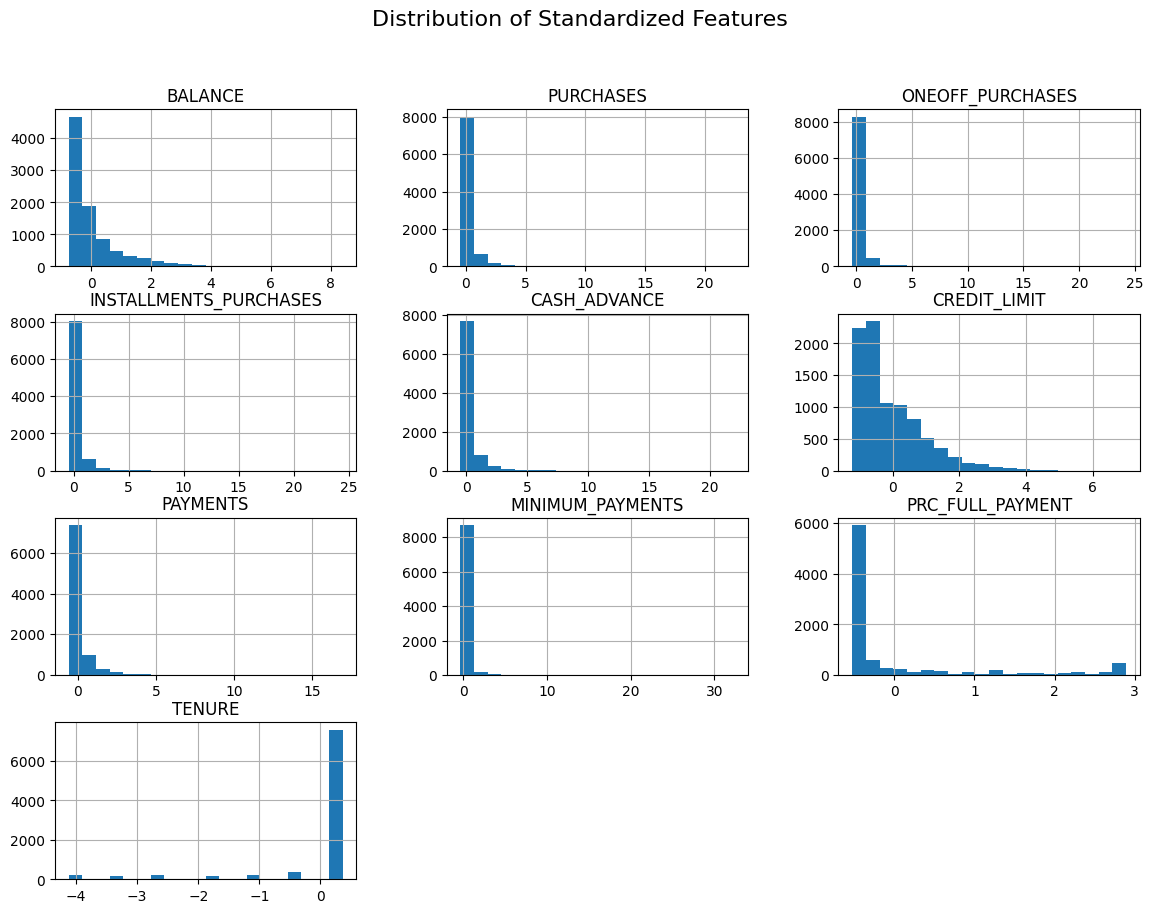

In [11]:
# Plot histograms of the standardized features
scaled_df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Standardized Features', fontsize=16)
plt.show()


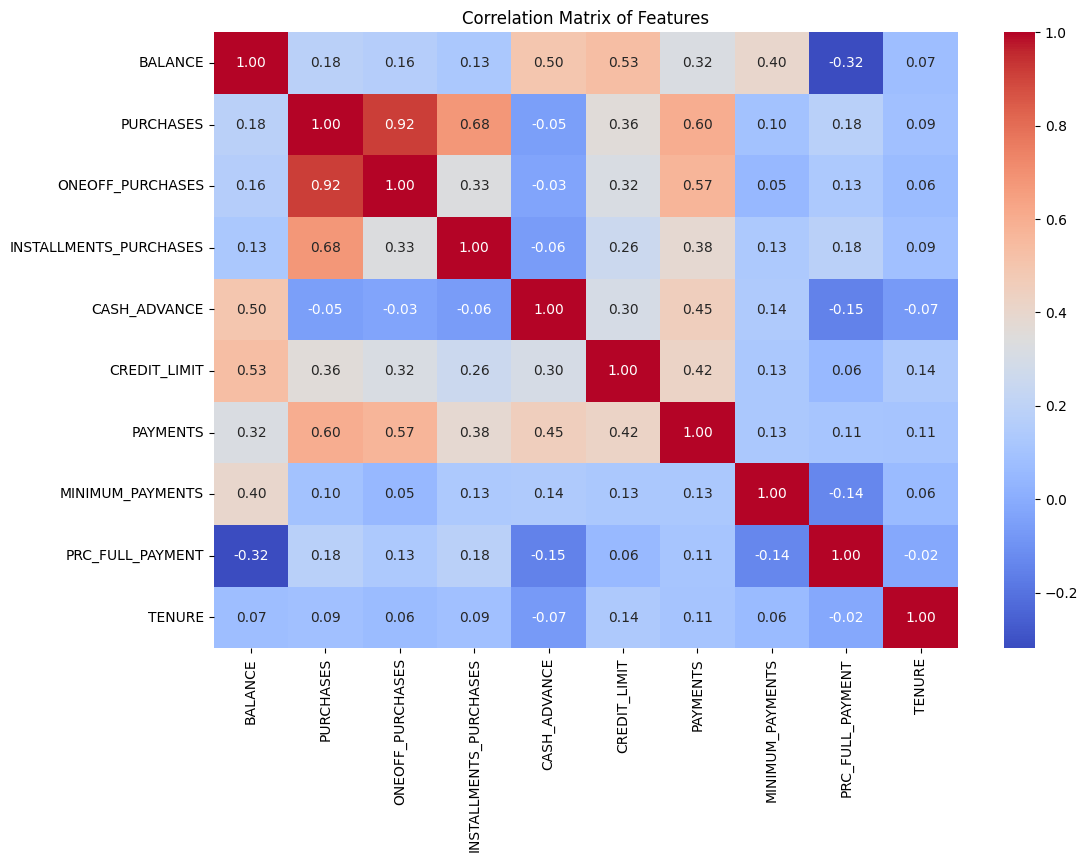

In [12]:
# Calculate the correlation matrix
corr_matrix = scaled_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


## Clustering

### Elbow Method
We used the Elbow Method to determine the optimal number of clusters for K-Means clustering.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

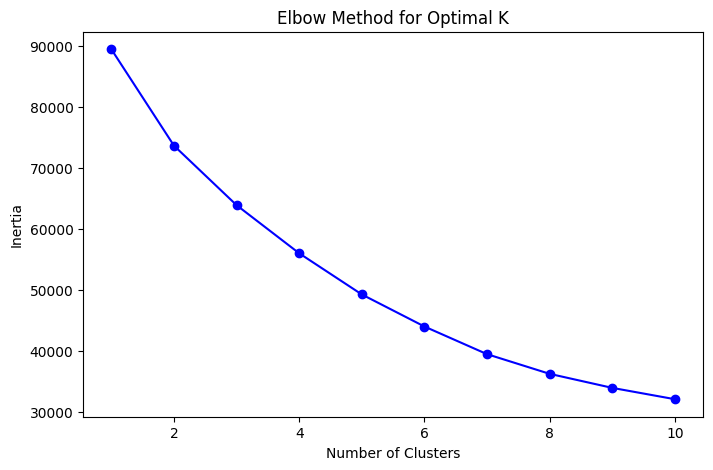

In [13]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


### K-Means Clustering
We applied K-Means clustering with the optimal number of clusters identified from the Elbow Method.


In [14]:
# Assuming the optimal number of clusters is 4
optimal_k = 4  # Replace with the optimal K from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Display the first few rows of the DataFrame with the cluster labels
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [16]:
# Exclude the non-numeric 'CUST_ID' column
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Summary statistics for each cluster, only for numeric columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
cluster_summary


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
Cluster,,,,,,,,,,,,,,,,,,
0,1043.332079,0.864908,571.313030,329.105313,242.516561,561.510919,0.426667,0.159511,0.310830,0.120177,2.518165,10.100773,3236.539653,997.704564,566.373905,0.040234,11.463587,0.0
1,5128.466399,0.966302,1307.464102,820.557428,486.972417,3765.856257,0.450458,0.242519,0.336306,0.328545,9.553585,19.441981,8990.136397,3970.383174,2583.095801,0.025716,11.688840,1.0
2,4308.974223,0.977398,14228.598899,9348.277706,4880.321193,849.703668,0.912691,0.706811,0.774854,0.070336,2.311927,115.027523,11888.073394,13905.711785,3070.341764,0.348337,11.972477,2.0
3,175.777538,0.837293,1554.071096,833.587459,720.995367,112.031543,0.771722,0.310691,0.591782,0.018730,0.413523,22.325267,5036.656853,1818.469462,204.318311,0.753198,11.549466,3.0


## Cluster Analysis and Insights
We analyze the characteristics of each cluster and derive business insights.


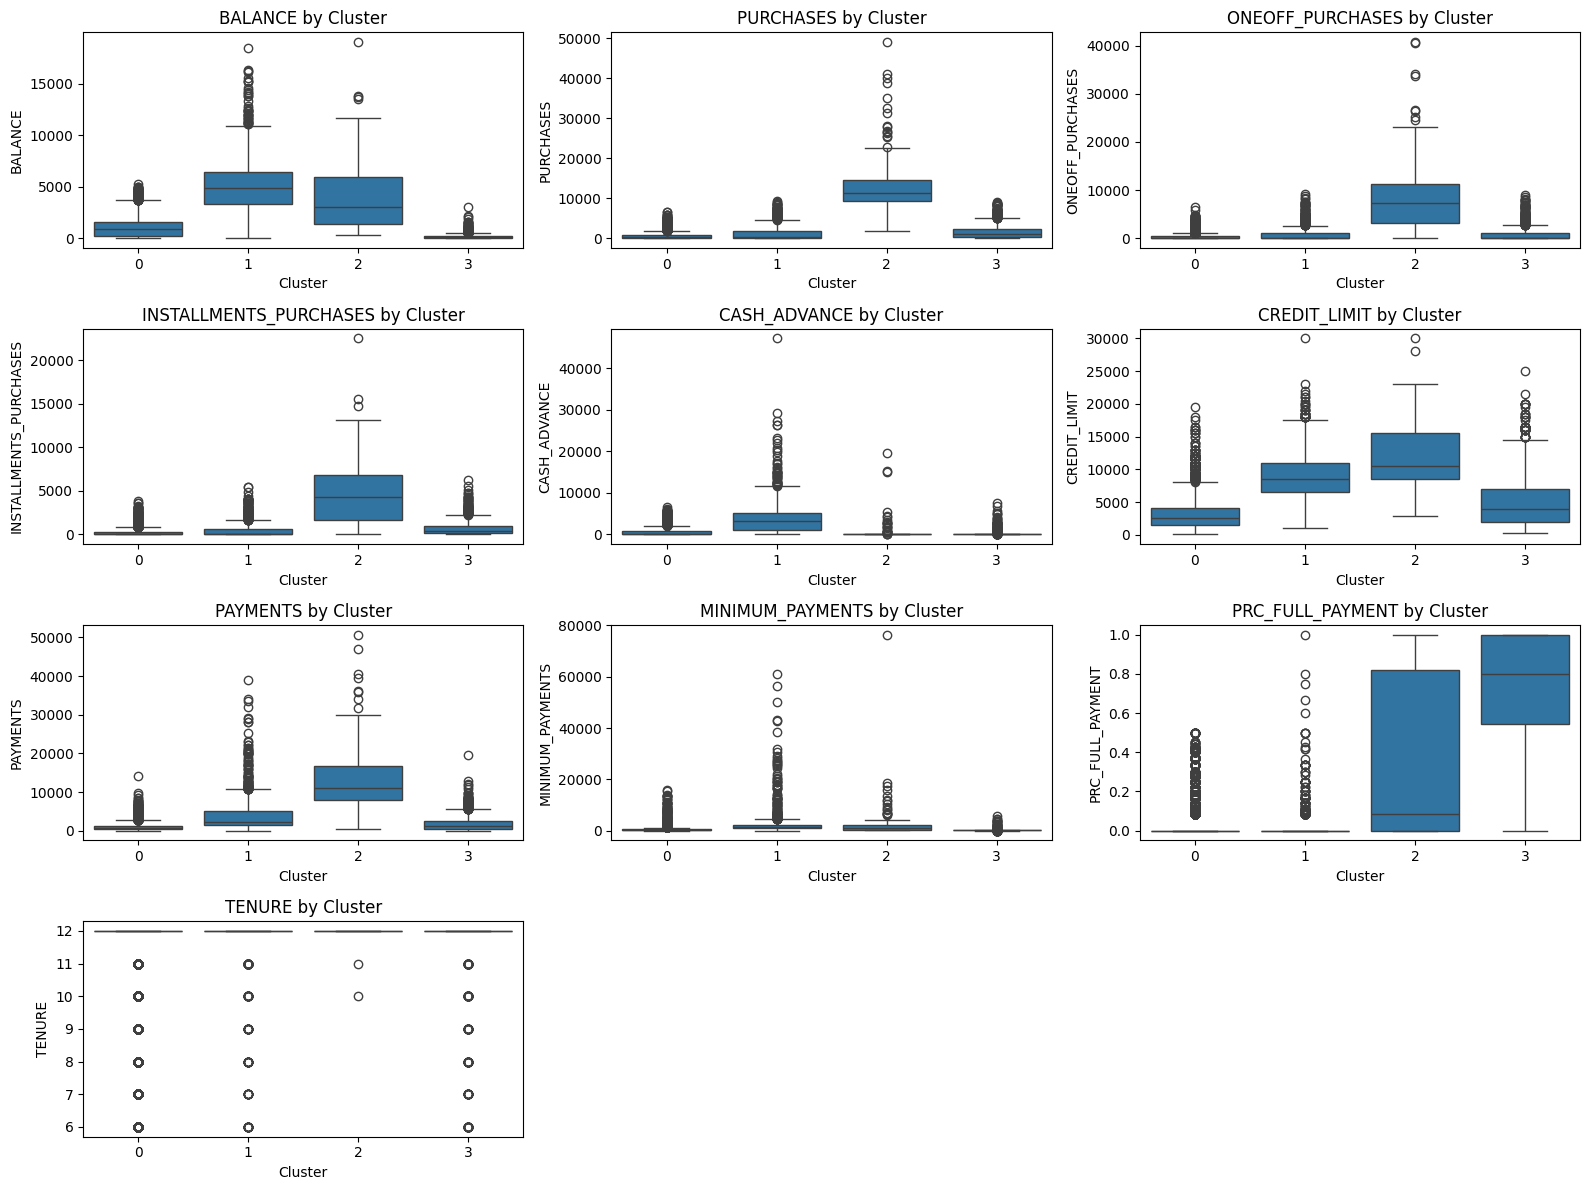

In [17]:
# Visualize clusters using box plots for each feature
plt.figure(figsize=(16, 12))
for i, column in enumerate(scaled_df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()


## Conclusion and Recommendations
Based on our clustering analysis, we have identified the following customer segments:
- **Cluster 0:** Low-value, less engaged customers.
- **Cluster 1:** Customers who rely heavily on cash advances.
- **Cluster 2:** High-value, highly engaged customers.
- **Cluster 3:** Moderately engaged, financially responsible customers.

### Recommendations
- **Cluster 2:** Target with premium offers and rewards programs.
- **Cluster 1:** Provide financial education and support.
- **Cluster 0 & 3:** Implement different engagement strategies.


## Future Work
Future work could involve exploring more sophisticated clustering techniques, such as hierarchical clustering or DBSCAN, and incorporating additional features like demographic data to refine the segmentation further.
